# Implement EM Algorithm
## Plotting geyser dataset

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
df = pd.read_csv("./data.txt", sep=r"\s+", engine="python",header=0)
df.head()

,id,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


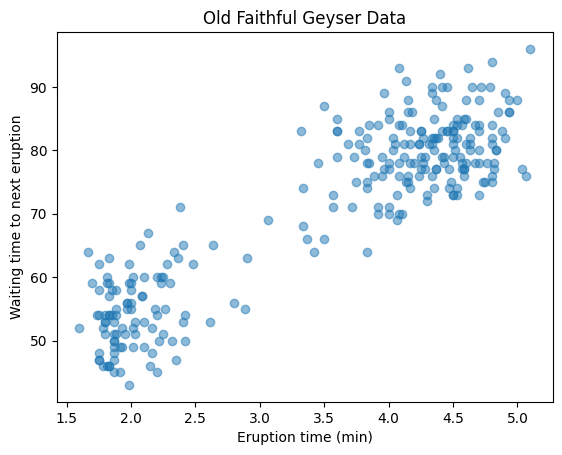

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df['eruptions'], df['waiting'], alpha=0.5)
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time to next eruption')
plt.title('Old Faithful Geyser Data')
plt.show()

## Implement and run EM algorithm
### E and M steps
I implemented the E and M steps from scratch for k=2.

In [61]:

from scipy.stats import multivariate_normal
def E_step(D, mean_1, cov_1, phi_1, mean_2, cov_2, phi_2):
    eps = 1e-6
    cov_1 += eps * np.eye(D.shape[1])
    cov_2 += eps * np.eye(D.shape[1])

    probs_1 = multivariate_normal.pdf(D, mean=mean_1, cov=cov_1, allow_singular=True) * phi_1
    probs_2 = multivariate_normal.pdf(D, mean=mean_2, cov=cov_2, allow_singular=True) * phi_2

    total = probs_1 + probs_2 + 1e-12

    posterior_1 = probs_1 / total
    posterior_2 = probs_2 / total

    return posterior_1, posterior_2



In [62]:
def M_step(D, posterior_1, posterior_2):
    n_1 = max(np.sum(posterior_1), 1e-6)  # prevent division by zero
    n_2 = max(np.sum(posterior_2), 1e-6)

    mean_1 = posterior_1 @ D / n_1
    mean_2 = posterior_2 @ D / n_2

    diff_1 = D - mean_1
    diff_2 = D - mean_2

    # Code adapted from ChatGPT (OpenAI 2025)
    # Weighted outer product for covariance
    sigma_1 = ((posterior_1[:, None, None] * diff_1[:, :, None] * diff_1[:, None, :]).sum(axis=0)) / n_1
    sigma_2 = ((posterior_2[:, None, None] * diff_2[:, :, None] * diff_2[:, None, :]).sum(axis=0)) / n_2

    # Tiny diagonal jitter to prevent singular matrix
    sigma_1 += 1e-6 * np.eye(D.shape[1])
    sigma_2 += 1e-6 * np.eye(D.shape[1])

    phi_1 = n_1 / (n_1 + n_2)
    phi_2 = n_2 / (n_1 + n_2)

    return mean_1, sigma_1, phi_1, mean_2, sigma_2, phi_2


### Termination conditions
I will continue the algorithm based on the validation log likelihood. I will split the training set into a 80-20 split into train and validation. I will use the elbow method on the validation log likelihood graph over time.

In [ ]:
# split data
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(
    df, test_size=0.2, random_state=5
)
print(df_train.shape, df_test.shape)


(217, 3) (55, 3)


In [26]:
# remove id column
D_train = df_train[['eruptions', 'waiting']].to_numpy()
D_test = df_test[['eruptions', 'waiting']].to_numpy()

In [68]:
# Initialize gaussian distributions
np.random.seed(5)

mean_1 = np.random.rand(2)
cov_1 = np.random.rand(2, 2)
cov_1 = cov_1 @ cov_1.T  # make it symmetric positive definite
phi_1 = np.random.rand()

mean_2 = np.random.rand(2)
cov_2 = np.random.rand(2, 2)
cov_2 = cov_2 @ cov_2.T  # make it symmetric positive definite
phi_2 = 1 - phi_1
print(mean_1, cov_1, phi_1)
print(mean_2, cov_2, phi_2)

[0.22199317 0.87073231] [[0.88657881 0.66291853]
 [0.66291853 0.61277604]] 0.7659078564803156
[0.51841799 0.2968005 ] [[0.04175841 0.17425279]
 [0.17425279 0.7400479 ]] 0.23409214351968444


In [ ]:
# Run EM algorithm
max_iters = 100
log_likelihoods = []
means_1 = []
means_2 = []
means_1.append(mean_1)
means_2.append(mean_2)
# Code adapted from VSCode Copilot suggestions
for i in range(max_iters):
    # E step

    posterior_1, posterior_2 = E_step(D_train, mean_1, cov_1, phi_1, mean_2, cov_2, phi_2)
    
    # M step
    mean_1, cov_1, phi_1, mean_2, cov_2, phi_2 = M_step(D_train, posterior_1, posterior_2)
    
    # Compute log likelihood for convergence check
    ll_1 = multivariate_normal.pdf(D_test, mean=mean_1, cov=cov_1) * phi_1
    ll_2 = multivariate_normal.pdf(D_test, mean=mean_2, cov=cov_2) * phi_2
    log_likelihood = np.sum(np.log(ll_1 + ll_2))
    log_likelihoods.append(log_likelihood)
    means_1.append(mean_1)
    means_2.append(mean_2)
    
    print(f"Iteration {i+1}, Log Likelihood: {log_likelihood}")

Iteration 1, Log Likelihood: -inf
Iteration 2, Log Likelihood: -inf
Iteration 3, Log Likelihood: -inf
Iteration 4, Log Likelihood: -inf
Iteration 5, Log Likelihood: -inf
Iteration 6, Log Likelihood: -inf
Iteration 7, Log Likelihood: -inf
Iteration 8, Log Likelihood: -inf
Iteration 9, Log Likelihood: -inf
Iteration 10, Log Likelihood: -inf
Iteration 11, Log Likelihood: -inf
Iteration 12, Log Likelihood: -inf
Iteration 13, Log Likelihood: -inf
Iteration 14, Log Likelihood: -inf
Iteration 15, Log Likelihood: -inf
Iteration 16, Log Likelihood: -inf
Iteration 17, Log Likelihood: -inf
Iteration 18, Log Likelihood: -inf
Iteration 19, Log Likelihood: -inf
Iteration 20, Log Likelihood: -inf
Iteration 21, Log Likelihood: -inf
Iteration 22, Log Likelihood: -inf
Iteration 23, Log Likelihood: -inf
Iteration 24, Log Likelihood: -inf
Iteration 25, Log Likelihood: -inf
Iteration 26, Log Likelihood: -inf
Iteration 27, Log Likelihood: -inf
Iteration 28, Log Likelihood: -inf
Iteration 29, Log Likelihood:

/tmp/ipykernel_6421/2223573106.py:20: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.sum(np.log(ll_1 + ll_2))
